In [3]:
from experiments.building_on_mit.emb_space.emb_space import run_tsi_experiment, display_embeddings, display_train_and_test_embs
from torch_geometric.utils import to_dense_batch
import matplotlib.pyplot as plt
from ts_vae.utils import remove_files

# if want to run name == main in notebook, cell with just following line
# %run -i experiments/building_on_mit/emb_space
remove_files()

Files removed.


Starting TS interpolation experiment...
===== Testing epoch: 005, Loss: 5.6845 =====
===== Testing epoch: 010, Loss: 4.5238 =====
Completed experiment, use the experiment log to print results.


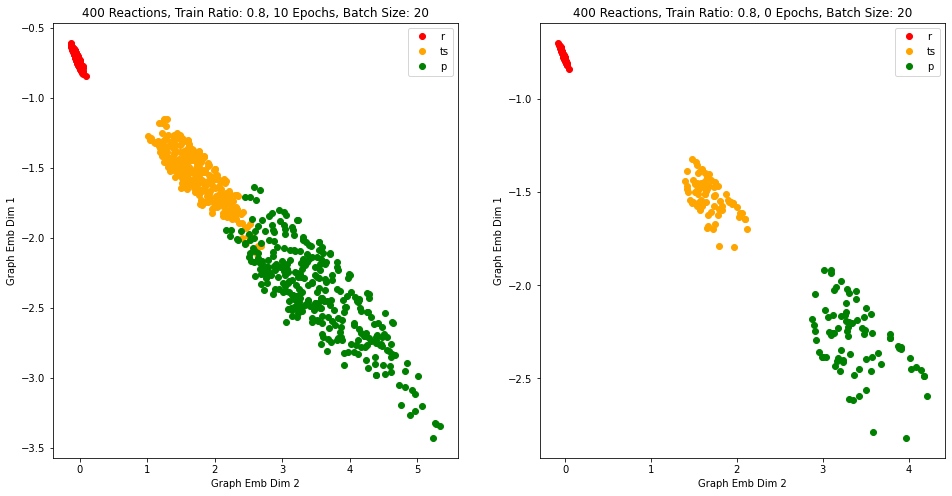

In [3]:
### keep for initial test
exp_log, test_log = run_tsi_experiment(train_ratio = 0.8, batch_size = 20, epochs = 10, test_interval = 5)
display_train_and_test_embs(exp_log, test_log)

# fig, ax = plt.subplots(figsize = (8, 8))
# e_fig, e_ax = display_embeddings(exp_log, fig, ax)
# t_fig, t_ax = display_embeddings(test_log)
plt.savefig(f'experiments/building_on_mit/emb_space/figs/traintest.png')

Starting TS interpolation experiment...
===== Testing epoch: 010, Loss: 0.9889 =====
===== Testing epoch: 020, Loss: 0.6449 =====
Completed experiment, use the experiment log to print results.
Starting TS interpolation experiment...
===== Testing epoch: 010, Loss: 1.0115 =====
===== Testing epoch: 020, Loss: 0.7245 =====
Completed experiment, use the experiment log to print results.


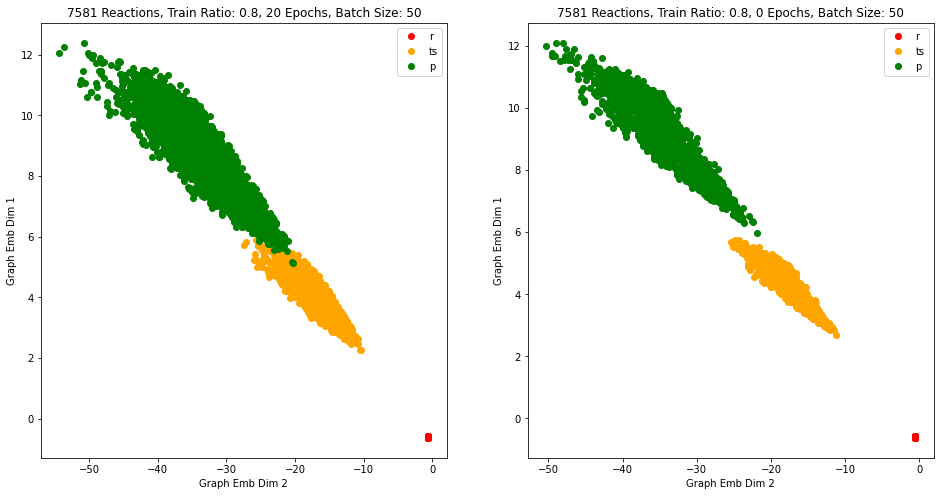

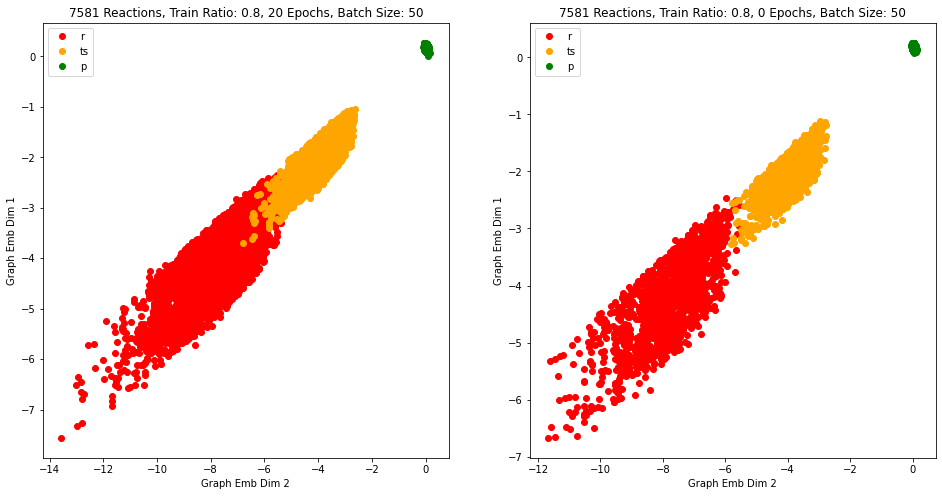

In [5]:
# modifying batch sizes
# exp_params = [(0.8, 50, 20), (0.8, 100, 20), (0.8, 150, 20)], took 30 mins! longer for bigger batches weirdly

exp_params = [(0.8, 50, 20), (0.8, 50, 20)]

for i, (t_ratio, b_size, epochs) in enumerate(exp_params):
    train_log, test_log = run_tsi_experiment(t_ratio, b_size, epochs)
    fig, axs = display_train_and_test_embs(train_log, test_log)
    file_name = f"tr{t_ratio}_bs{b_size}_e{epochs}"
    plt.savefig(f'experiments/building_on_mit/emb_space/figs/traintest2/{i}.png')

In [1]:
from experiments.building_on_mit.emb_space.tsi import tsi_main, display_train_and_test_embs
from ts_vae.utils import remove_files
import matplotlib.pyplot as plt

# remove_files()
# all data, tt=0.8, b=20, e=10, ti=5, time = 280s

In [13]:
train_log, test_log = tsi_main(tt_split = 0.8, batch_size = 20, epochs = 10, test_interval = 5, train_on_ts = True)

Starting TS interpolation experiment...
===== Training epoch 001 complete with loss: 15.0500 ====
===== Training epoch 002 complete with loss: 7.5515 ====
===== Training epoch 003 complete with loss: 4.4611 ====
===== Training epoch 004 complete with loss: 2.2746 ====
===== Training epoch 005 complete with loss: 1.5303 ====
===== Testing epoch 005 complete with loss: 1.2060 ====
===== Training epoch 006 complete with loss: 1.0433 ====
===== Training epoch 007 complete with loss: 0.9345 ====
===== Training epoch 008 complete with loss: 0.7754 ====
===== Training epoch 009 complete with loss: 0.5656 ====
===== Training epoch 010 complete with loss: 0.4610 ====
===== Testing epoch 010 complete with loss: 0.4446 ====
Completed experiment, use the experiment log to print results.


(<Figure size 1152x576 with 2 Axes>,
 array([<AxesSubplot:title={'center':'[Train] 7581 Reactions, Train Ratio: 0.8, 10 Epochs, Batch Size: 20'}, xlabel='Graph Emb Dim 2', ylabel='Graph Emb Dim 1'>,
        <AxesSubplot:title={'center':'[Test] 7581 Reactions, Train Ratio: 0.8, 2 Epochs, Batch Size: 20'}, xlabel='Graph Emb Dim 2', ylabel='Graph Emb Dim 1'>],
       dtype=object))

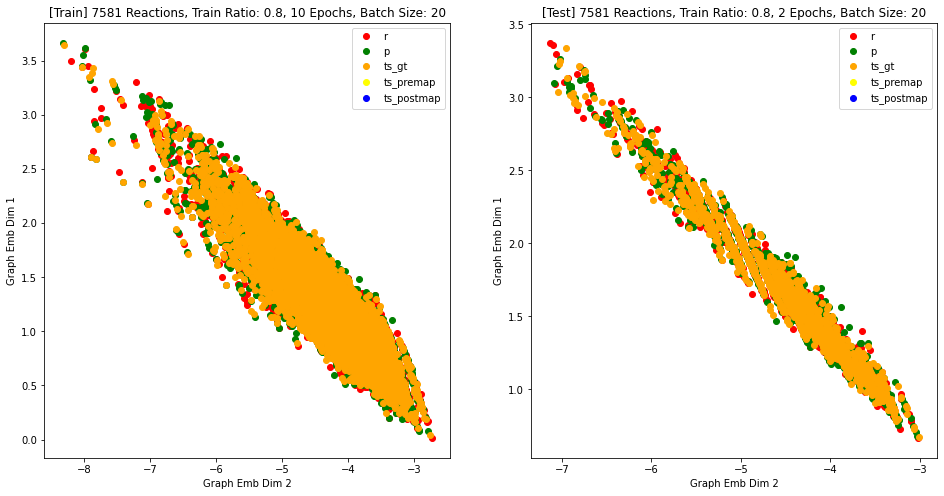

In [15]:
which_to_print = {'r': True, 'p': True, 'ts_gt': True, 'ts_premap': False, 'ts_postmap': False}
display_train_and_test_embs(train_log, test_log, which_to_print)
# plt.savefig(f'experiments/building_on_mit/emb_space/figs/full/new.png')

In [2]:
train_log, test_log = tsi_main(tt_split = 0.8, batch_size = 40, epochs = 10, test_interval = 5, train_on_ts = False)

Starting TS interpolation experiment...
===== Training epoch 001 complete with loss: 7.9404 ====
===== Training epoch 002 complete with loss: 5.2525 ====
===== Training epoch 003 complete with loss: 2.4375 ====
===== Training epoch 004 complete with loss: 1.9681 ====
===== Training epoch 005 complete with loss: 1.7098 ====
===== Testing epoch 005 complete with loss: 1.5903 ====
===== Training epoch 006 complete with loss: 1.4693 ====
===== Training epoch 007 complete with loss: 1.2498 ====
===== Training epoch 008 complete with loss: 1.0484 ====
===== Training epoch 009 complete with loss: 0.8905 ====
===== Training epoch 010 complete with loss: 0.8145 ====
===== Testing epoch 010 complete with loss: 0.7507 ====
Completed experiment, use the experiment log to print results.


(<Figure size 1152x576 with 2 Axes>,
 array([<AxesSubplot:title={'center':'[Train] 7581 Reactions, Train Ratio: 0.8, 10 Epochs, Batch Size: 40'}, xlabel='Graph Emb Dim 2', ylabel='Graph Emb Dim 1'>,
        <AxesSubplot:title={'center':'[Test] 7581 Reactions, Train Ratio: 0.8, 2 Epochs, Batch Size: 40'}, xlabel='Graph Emb Dim 2', ylabel='Graph Emb Dim 1'>],
       dtype=object))

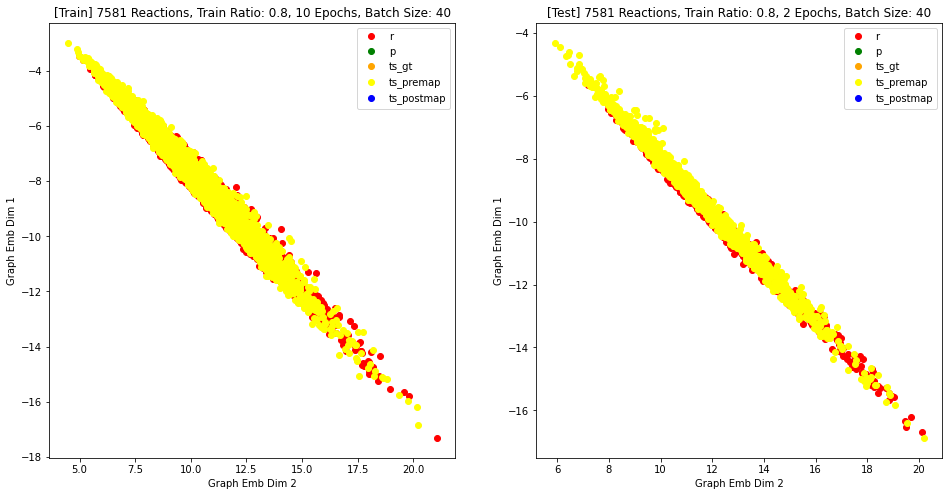

In [5]:
which_to_print = {'r': True, 'p': False, 'ts_gt': False, 'ts_premap': True, 'ts_postmap': False}
display_train_and_test_embs(train_log, test_log, which_to_print)
# plt.savefig(f'experiments/building_on_mit/emb_space/figs/full/all.png')

### Experiment Tracking with W&B

- config: store hp and metadata for each run
- wandb.init
- wandb.watch: log model gradients and params over time (helps detect bugs e.g. weird grad behaviour)
- wandb.log: log stuff we care about
- wandb.save: save online

use with block in context manager syntax

Convert MLP to GNN by swapping torch.nn.Linear with PyG's GNN operators e.g. GCN layer
Lucky's work
- PairFeatures: a manual MP I think. it has to be otherwise what he's doing isn't a GNN.
- set edges: iterate: 
    - compute features (i.e. MP) -> MLP(features) -> update edges
    - compute features (i.e. MP) -> MLP(MLP(edges)) -> update vertices

Loose notes
- Can define data class for parameters e.g. 
    - @dataclass
      class GNNParams:
        input_dim: int
        output_dim: int
        ... (hidden_sizes, dropout, batchnorm, activation)